## Demo 1: Explore and Preprocess Raster data

- Explore raster data
  - Read raster data
  - Visualize raster data
  - Raster object properties and methods
- Data preprocessing
  - Clip, resample
  - Save raster data
  - Batch processing with 

### Import relevant modules

In [14]:
import os
import arcpy
from arcpy.sa import *
from arcpy.ia import *

### Set environment workspace

In [12]:
arcpy.env.workspace = r'C:\DevSummit20\PythonRaster\Data\SuitabilityModeling\Data.gdb'

### Reading a raster dataset

In [15]:
elev = Raster(r'Elevation')

### Visualize raster data

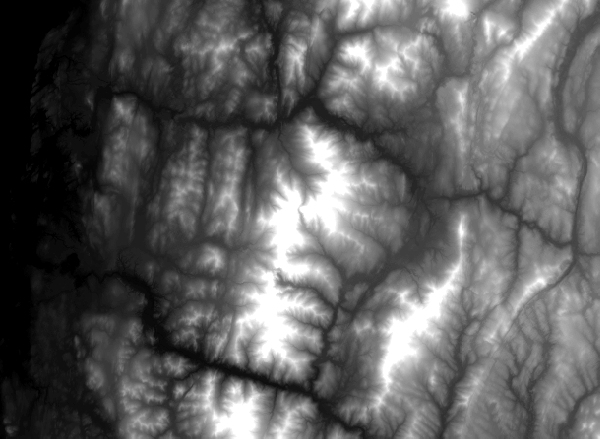

In [16]:
elev

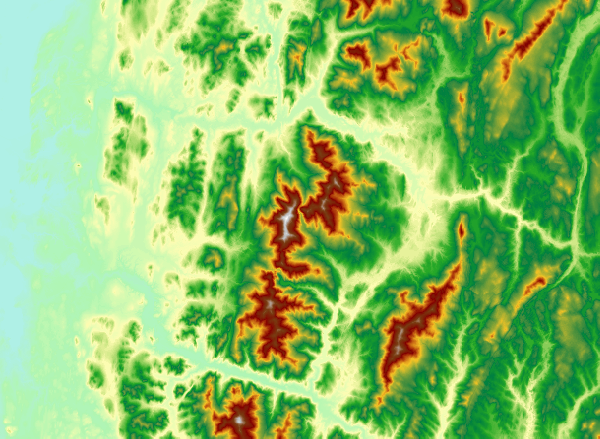

In [17]:
Render(elev, colormap='Elevation #1')

### Raster object properties and methods

In [22]:
elev.minimum
# elev.mean
# elev.catalogPath
# print('The raster has {} band(s)'.format(elev.bandCount))
# print('The size of the raster is {} x {}'.format(elev.height, elev.width))
# print('The cell size of the raster is {} x {}'.format(elev.meanCellWidth, elev.meanCellHeight))

The cell size of the raster is 30.0 x 30.0


In [137]:
elev_rasterInfo = elev.getRasterInfo()

In [138]:
elev_rasterInfo.getCellSize()

(30.0, 30.0)

### Data preprocessing

In [57]:
elev_m = elev * 0.3048

In [58]:
elev_clip = Clip(elev_m, r'StudyArea')

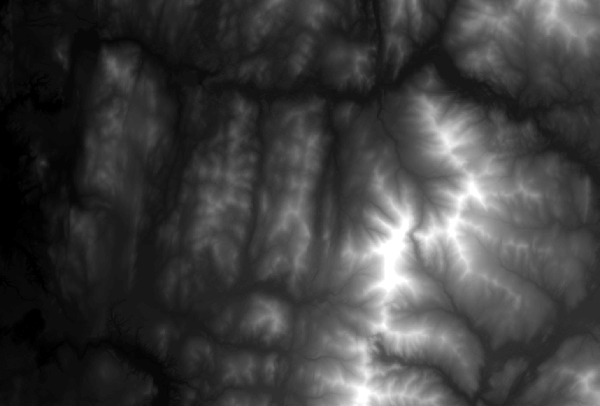

In [59]:
elev_clip

In [144]:
elev_final = Resample(elev_clip, "Bilinear", 30, 100)

In [145]:
elev_final.getRasterInfo().getCellSize()

(100.0, 100.0)

### Saving a temporary raster

In [146]:
elev_final.save(r'Elevation_final')

### List raster datasets in a workspace

In [60]:
arcpy.env.workspace = r'C:\DevSummit20\PythonRaster\Data\SuitabilityModeling\Input'

In [64]:
rasters = arcpy.ListRasters()

In [65]:
rasters

['elevation', 'landuse']

In [67]:
for raster in rasters:
    raster_clip = Clip(raster, r'StudyArea')
    raster_final = Resample(raster_clip, "Bilinear", 30, 100)
    raster_final.save(raster + '+')